In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0-dlenv_tfe
tensorboard2.1.1
seaborn0.10.0
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14255857771718045136,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3227163607879888411
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16981017983766630430
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14728907981
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6327923247002145564
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/pets"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['dogs', 'cats']

In [3]:

cat_image = train_path + '/cats/' + os.listdir(train_path + '/cats')[0]
imread(cat_image).shape
# plt.imshow(imread(cat_image))

(500, 375, 3)

'../input/pets/train/dogs/super-perro-de-lado.JPG'

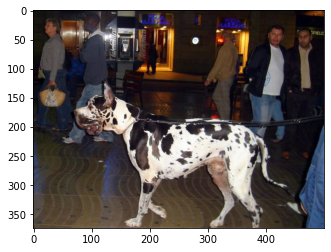

In [4]:
dog_image = train_path + '/dogs/' + os.listdir(train_path + '/dogs/')[5]
plt.imshow(imread(dog_image))
dog_image

In [5]:
# len(os.listdir(train_path + '/dogs'))

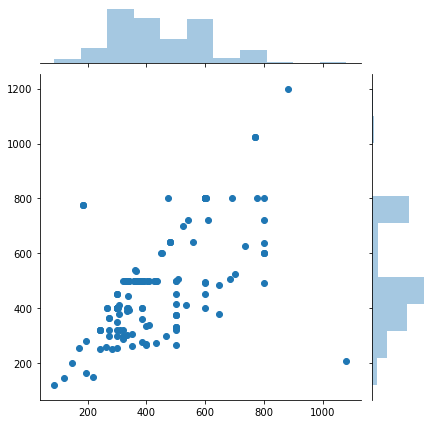

In [6]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path + '/dogs/'):
    img = imread(test_path+'/dogs/' + image_filename)
#     print (train_path+'\\dogs\\' + image_filename)
    d1,d2, _ = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(dim1, dim2)

In [7]:
# np.mean(dim2)
# imread(dog_image).shape
image_shape =(128, 128, 3)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale =1./255)
# image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale =1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

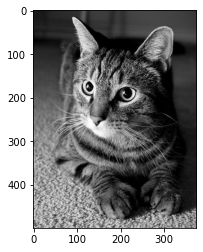

In [9]:
plt.imshow(imread(cat_image))
cat_image
plt.imshow(image_gen.random_transform(imread(cat_image)))

In [10]:
# image_gen.flow_from_directory(train_path)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
batch_size=32

train_image_gen= image_gen.flow_from_directory(train_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary')

test_image_gen= image_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary')

train_image_gen.class_indices

Found 1101 images belonging to 2 classes.
Found 397 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten


import keras_resnet.models
import keras

# x = keras.layers.Input(image_shape)
# base_model = keras_resnet.models.ResNet50(x, classes=1)

model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))



from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D, BatchNormalization
from keras.models import Sequential,Model,load_model
from keras import applications




# model = Sequential()

# model.add(applications.ResNet50(include_top=False, pooling=None, input_shape=image_shape))
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1, activation='sigmoid'))

# model.layers[0].trainable = False

# base_model = applications.ResNet50(weights= None, include_top=False, input_shape= image_shape)
# x = base_model.output
# # x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dense(1024, activation = 'relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(1, activation= 'sigmoid')(x)
# model = Model(inputs = base_model.input, outputs = predictions)

from keras.optimizers import SGD, Adam
opt = Adam(lr=0.001)
# opt = SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

results = model.fit_generator(train_image_gen, epochs=25, verbose = 1, validation_data=test_image_gen)

Using TensorFlow backend.


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 13 steps
Epoch 1/25
35/35 [==============================] - 10s 277ms/step - loss: 0.7393 - accuracy: 0.4814 - val_loss: 0.6939 - val_accuracy: 0.5088
Epoch 2/25
35/35 [==============================] - 6s 178ms/step - loss: 0.6884 - accuracy: 0.5313 - val_loss: 0.7097 - val_accuracy: 0.5567
Epoch 3/25
35/35 [==============================] - 6s 177ms/step - loss: 0.6671 - accuracy: 0.5995 - val_loss: 0.6826 - val_accuracy: 0.5315
Epoch 4/25
35/35 [==============================] - 6s 176ms/step - loss: 0.6401 - accuracy: 0.6249 - val_loss: 0.6682 - val_accuracy: 0.5894
Epoch 5/25
35/35 [==============================] - 6s 176ms/step - loss: 0.6431 - accuracy: 0.6421 - val_loss: 0.7660 - val_accuracy: 0.4887
Epoch 6/25
35/35 [==============================] - 6s 174ms/step - loss: 0.6106 - accuracy: 0.6449 - val_loss: 0.6644 - 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 128)     6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 256)       524544    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       1048832   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [14]:
help(Flatten())

Help on Flatten in module keras.layers.core object:

class Flatten(keras.engine.base_layer.Layer)
 |  Flatten(data_format=None, **kwargs)
 |  
 |  Flattens the input. Does not affect the batch size.
 |  
 |  # Arguments
 |      data_format: A string,
 |          one of `channels_last` (default) or `channels_first`.
 |          The ordering of the dimensions in the inputs.
 |          The purpose of this argument is to preserve weight
 |          ordering when switching a model from one data format
 |          to another.
 |          `channels_last` corresponds to inputs with shape
 |          `(batch, ..., channels)` while `channels_first` corresponds to
 |          inputs with shape `(batch, channels, ...)`.
 |          It defaults to the `image_data_format` value found in your
 |          Keras config file at `~/.keras/keras.json`.
 |          If you never set it, then it will be "channels_last".
 |  
 |  # Example
 |  
 |  ```python
 |      model = Sequential()
 |      model.add(Con

In [15]:


# model.fit(X_train, Y_train, epochs = 100, batch_size = 64)

In [16]:
history = results.history
history


{'loss': [0.7212251101051212,
  0.6884123135111095,
  0.6661352801604449,
  0.6415134837257115,
  0.6443187234403869,
  0.6107341110652192,
  0.6001284249688581,
  0.6084891194435383,
  0.5664028569744675,
  0.5397822104671887,
  0.5099180240343095,
  0.46561616437203446,
  0.4675109664166006,
  0.3785671604751566,
  0.3403640870989506,
  0.2568280654912857,
  0.18374290447902072,
  0.15041877931283346,
  0.10380079515225894,
  0.05526767290797047,
  0.05594624030817432,
  0.11666990276578337,
  0.044936714127581975,
  0.02938822318260963,
  0.061268066295511854],
 'accuracy': [0.48138055,
  0.5313352,
  0.59945506,
  0.62488645,
  0.6421435,
  0.6448683,
  0.66394186,
  0.67120796,
  0.6948229,
  0.6948229,
  0.7356948,
  0.76203454,
  0.77111715,
  0.8110808,
  0.84559494,
  0.88646686,
  0.9273388,
  0.94187105,
  0.9645777,
  0.98274297,
  0.98092645,
  0.96003634,
  0.9845595,
  0.99000907,
  0.98092645],
 'val_loss': [0.6938612736188449,
  0.7096558167384222,
  0.6825723189574021

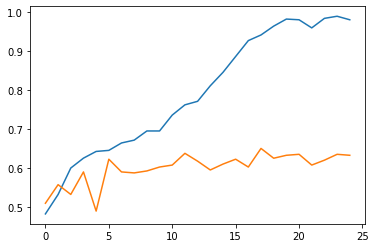

In [17]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

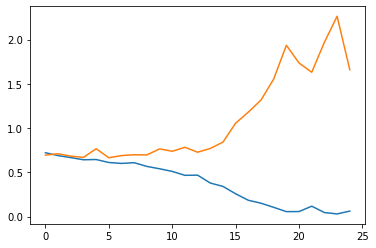

In [18]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

In [19]:
model.evaluate_generator(train_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.01756668203077944, 0.9981835]

In [20]:
pred = model.predict_generator(train_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [21]:
predictions = pred > 0.5

In [22]:
pred
len(pred)

1101

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [397, 1101]

In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

In [ ]:
dog_image

In [ ]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(dog_image, target_size=image_shape)
my_image

In [ ]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape

In [ ]:
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

In [ ]:
model.predict(my_img_arr)

In [ ]:
# ! pip install keras-resnet